<a href="https://colab.research.google.com/github/beramm/ds-content-interactive-jupyterlab-tutorial/blob/master/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Exercises

This is a quick demonstration of how exercises work on [Notebooks.ai](https://notebooks.ai).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Example 1: Solve the add function

Complete the code of the function `add`, that receives 2 numbers and should return the sum of them:

In [ ]:
def add(x, y):
    pass

You can use the `+` operator to sum numbers.

In [ ]:
def add(x, y):
    return x + y

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


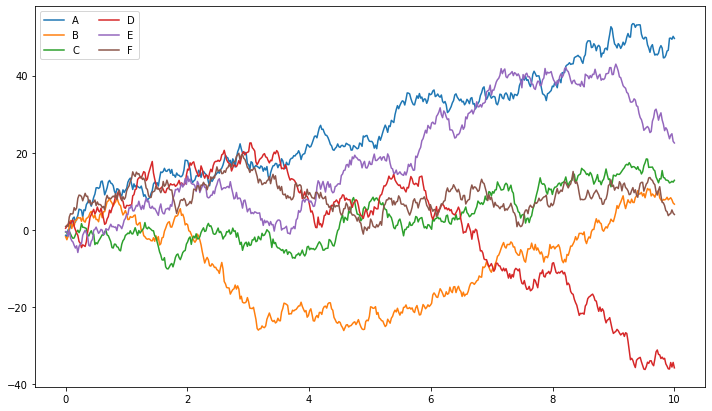

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x=np.linspace(0,10,500)
y=np.cumsum(np.random.randn(500,6),0)
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upperleft')


In [24]:
import requests
import pandas as pd

def get_price(symbol,exchange='bitfinex',after='2020-04-04') : 
    url='https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange
    )
    resp=requests.get(url,params={
        'periods':'3600',
        'after' : str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data=resp.json()
    df=pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime','OpenPrice','HighPrice','LowPrice','ClosePrice','Volume','NA'                                                    
    ])
    df['CloseTime']=pd.to_datetime(df['CloseTime'],unit='s')
    df.set_index('CloseTime',inplace=True)
    return df

In [25]:
lastweek=(pd.Timestamp.now()-pd.offsets.Day(7))
lastweek

Timestamp('2022-07-21 16:05:41.237069')

In [34]:
btc=get_price('btc','bitstamp',after='2022-07-25')

In [31]:
eth=get_price('eth','bitstamp',after=lastweek)

In [35]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-25 00:00:00,22666.85,22766.90,22528.78,22595.81,24.829666,5.614260e+05
2022-07-25 01:00:00,22589.47,22673.68,22270.75,22306.89,187.576806,4.200409e+06
2022-07-25 02:00:00,22317.12,22332.18,22124.06,22214.89,74.927991,1.663864e+06
2022-07-25 03:00:00,22203.00,22210.16,21883.99,21968.00,198.052994,4.355863e+06
2022-07-25 04:00:00,21935.85,21961.18,21776.59,21862.71,89.939358,1.964510e+06


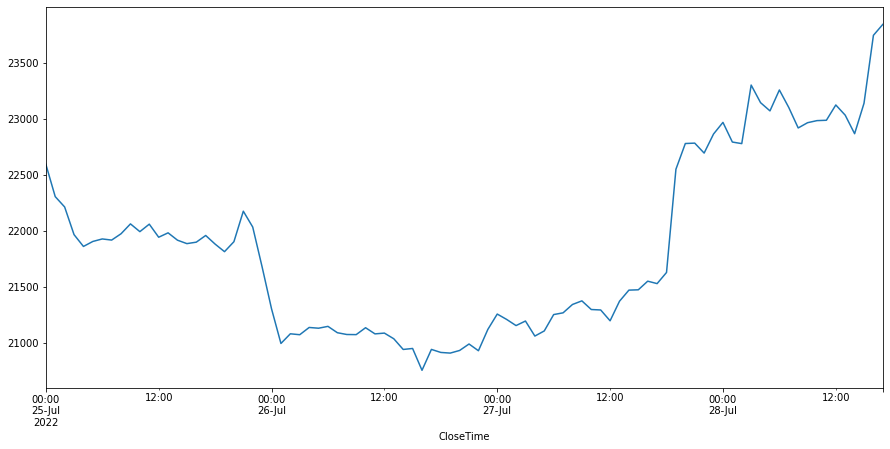

In [37]:
btc['ClosePrice'].plot(figsize=(15,7))

In [36]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-21 17:00:00,1509.30,1570.11,1509.30,1560.00,2025.007408,3.135662e+06
2022-07-21 18:00:00,1559.34,1566.10,1529.59,1536.73,1054.317019,1.629589e+06
2022-07-21 19:00:00,1535.21,1549.23,1534.56,1543.59,448.137655,6.910561e+05
2022-07-21 20:00:00,1544.74,1581.10,1543.27,1578.21,719.628411,1.126990e+06
2022-07-21 21:00:00,1578.22,1605.28,1576.71,1585.89,2174.356437,3.457344e+06


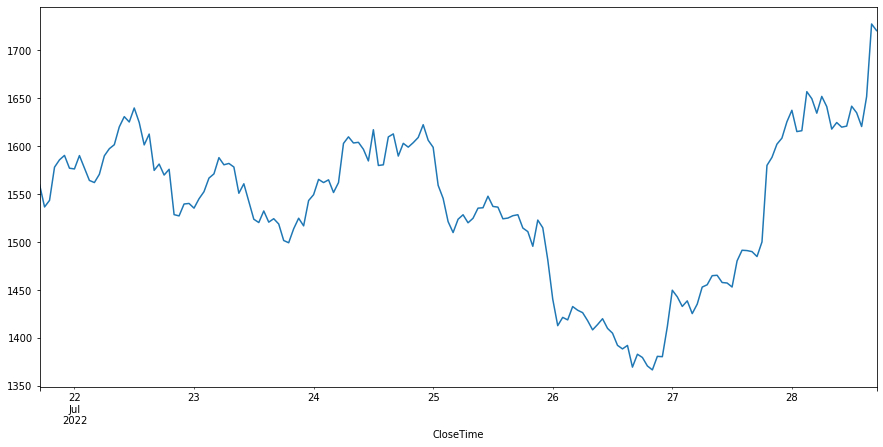

In [38]:
eth['ClosePrice'].plot(figsize=(15,7))

In [40]:
from bokeh.plotting import figure,output_file, show
from bokeh.io import output_notebook

In [41]:
output_notebook()

In [51]:
p1=figure(x_axis_type="datetime", title="Crypto Prices",width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label='Date'
p1.yaxis.axis_label='Price'

p1.line(btc.index, btc['ClosePrice'],color='#ff0000',legend='beramme\'s horknee level')

p1.legend.location="top_left"
show(p1)

In [52]:
exporter=pd.ExcelWriter('cryptos note.xlsx')
btc.to_excel(exporter,sheet_name="Bitcoinn")
eth.to_excel(exporter,sheet_name="Ethereum")
exporter.save()